# 3 深度卷积网络与计算机图像

## Alexnet

In [2]:
import torch
from torch import nn, optim
import torchvision

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

In [5]:
class AlexNet(nn.Module):

    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 96, 11, 4), # in_channels, out_channels, kernel_size, stride, padding
            nn.ReLU(),
            nn.MaxPool2d(3, 2), # kernel_size, stride
        # 减小卷积窗⼝口，使用填充为2来使得输入与输出的高和宽一致，且增⼤输出通道数
            nn.Conv2d(96, 256, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(3, 2),
        # 连续3个卷积层，且使用更小的卷积窗口。除了最后的卷积层外，进一步 增⼤了输出通道数。
        # 前两个卷积层后不使用池化层来减小输入的⾼和宽 
            nn.Conv2d(256, 384, 3, 1, 1), 
            nn.ReLU(),
            nn.Conv2d(384, 384, 3, 1, 1), 
            nn.ReLU(),
            nn.Conv2d(384, 256, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(3, 2)
)
        # 这里全连接层的输出个数⽐ALexNet中的⼤数倍。使⽤dropout来缓解过拟合。
        self.fc = nn.Sequential(
            nn.Linear(256*5*5, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
        # 输出层，论⽂1000 
            nn.Linear(4096, 1000),
        )

In [6]:
def forward(self, img):
    feature = self.conv(img)
    output = self.fc(feature.view(img.shape[0], -1))
    return output

net = AlexNet()
print(net)

AlexNet(
  (conv): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=6400, out_features=4096, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (

In [7]:
import torch
import torchvision.models as models # 导入网络框架
import ptflops # 导入计算FLOPs的包

In [8]:
ptflops.get_model_complexity_info(models.vgg16(), (3,224,224))
# ('15.5 GMac', '138.36 M')

/Users/du/miniforge3/envs/tf/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /tmp/pip-req-build-gqmopi53/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


VGG(
  138.358 M, 100.000% Params, 15.504 GMac, 100.000% MACs, 
  (features): Sequential(
    14.715 M, 10.635% Params, 15.38 GMac, 99.202% MACs, 
    (0): Conv2d(0.002 M, 0.001% Params, 0.09 GMac, 0.580% MACs, 3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(0.0 M, 0.000% Params, 0.003 GMac, 0.021% MACs, inplace=True)
    (2): Conv2d(0.037 M, 0.027% Params, 1.853 GMac, 11.951% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(0.0 M, 0.000% Params, 0.003 GMac, 0.021% MACs, inplace=True)
    (4): MaxPool2d(0.0 M, 0.000% Params, 0.003 GMac, 0.021% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(0.074 M, 0.053% Params, 0.926 GMac, 5.976% MACs, 64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(0.0 M, 0.000% Params, 0.002 GMac, 0.010% MACs, inplace=True)
    (7): Conv2d(0.148 M, 0.107% Params, 1.851 GMac, 11.941% MACs, 128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

('15.5 GMac', '138.36 M')

In [9]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)

1.9.0.post2
False
None


In [12]:
## Assignment

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# 超参数定义
EPOCH = 10               # 训练epoch次数
BATCH_SIZE = 64         # 批训练的数量
LR = 0.001              # 学习率
DOWNLOAD_MNIST = False  # 设置True 可以自动下载数据

In [15]:
import os
path = os.path.expanduser('~/data/MS/')

In [16]:
# MNIST数据集下载
train_data = datasets.CIFAR10(root=path,
                         train=True,                         # 这里是训练集
                         transform=transforms.ToTensor(),
                         download=True
                        )

test_data = datasets.CIFAR10(root=path,
                        train=False,                         # 测试集
                        transform=transforms.ToTensor(),
                        download=True
                        )

170499072it [00:31, 5348209.39it/s]                                


Extracting /Users/du/data/MS/cifar-10-python.tar.gz to /Users/du/data/MS/
Files already downloaded and verified


In [17]:
# Cifar-10的标签
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

(32, 32, 3)


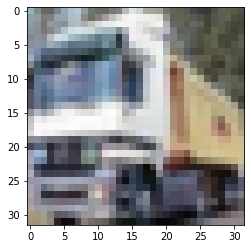

In [18]:
# 输出图像
temp = train_data[1][0].numpy()
#print(temp)
#print(temp.shape)
temp = temp.transpose(1, 2, 0)
print(temp.shape)
#print(temp)
plt.imshow(temp)
plt.show()

In [19]:
# 使用DataLoader进行分批
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

In [20]:
# ResNet Model
#model = ResNet34()
model = torchvision.models.resnet50(pretrained=False)
#model = torchvision.models.densenet161(pretrained=False)

In [21]:
#损失函数:这里用交叉熵
criterion = nn.CrossEntropyLoss()
#优化器 这里用SGD
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [22]:
#device : GPU or CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [26]:
import time
# 训练
for epoch in range(EPOCH):
    start_time = time.time()
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 前向传播
        outputs = model(inputs)
        # 计算损失函数
        loss = criterion(outputs, labels)
        # 清空上一轮梯度
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 参数更新
        optimizer.step()
    print('epoch{} loss:{:.4f} time:{:.4f}'.format(epoch+1, loss.item(), time.time()-start_time))

In [ ]:
#保存训练模型
file_name = 'cifar10_resnet.pt'
torch.save(model, file_name)
print(file_name+' saved')

In [ ]:
# 测试
model = torch.load('cifar10_resnet.pt')
model.eval()
print(model)
correct = 0
total = 0

FileNotFoundError: [Errno 2] No such file or directory: 'cifar10_resnet.pt'

In [ ]:
for data in test_loader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # 前向传播
    out = model(images)
    _, predicted = torch.max(out.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

NameError: name 'total' is not defined

In [ ]:
#输出识别准确率
print('10000测试图像 准确率:{:.4f}%'.format(100 * correct / total)) 

In [ ]:
## Cifar10 Resnet

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 超参数定义
EPOCH = 10               # 训练epoch次数
BATCH_SIZE = 64         # 批训练的数量
LR = 0.001              # 学习率
DOWNLOAD_MNIST = False  # 设置True 可以自动下载数据

In [ ]:
# MNIST数据集下载
train_data = datasets.CIFAR10(root=path,
                         train=True,                         # 这里是训练集
                         transform=transforms.ToTensor(),
                         download=True
                        )

test_data = datasets.CIFAR10(root=path,
                        train=False,                         # 测试集
                        transform=transforms.ToTensor(),
                        download=True
                        )
# Cifar-10的标签
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 输出图像
temp = train_data[1][0].numpy()
#print(temp)
#print(temp.shape)
temp = temp.transpose(1, 2, 0)
print(temp.shape)
#print(temp)
plt.imshow(temp)
plt.show()

# 使用DataLoader进行分批
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

# ResNet Model
#model = ResNet34()
model = torchvision.models.resnet50(pretrained=False)
#model = torchvision.models.densenet161(pretrained=False)


#损失函数:这里用交叉熵
criterion = nn.CrossEntropyLoss()
#优化器 这里用SGD
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#device : GPU or CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# 训练
for epoch in range(EPOCH):
    start_time = time.time()
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 前向传播
        outputs = model(inputs)
        # 计算损失函数
        loss = criterion(outputs, labels)
        # 清空上一轮梯度
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 参数更新
        optimizer.step()
    print('epoch{} loss:{:.4f} time:{:.4f}'.format(epoch+1, loss.item(), time.time()-start_time))

#保存训练模型
file_name = 'cifar10_resnet.pt'
torch.save(model, file_name)
print(file_name+' saved')


# 测试
model = torch.load('cifar10_resnet.pt')
model.eval()
print(model)
correct = 0
total = 0

for data in test_loader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # 前向传播
    out = model(images)
    _, predicted = torch.max(out.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

#输出识别准确率
print('10000测试图像 准确率:{:.4f}%'.format(100 * correct / total)) 
